# <center>House Price Prediction using Regression Analysis<center/>

<img src="./Downloads/house.jpg" width="50%" height="2%">
    

## Outline
- Importing important libraries
- Loading the dataset
- Exploratory Data Analysis(EDA) for Machine Learning
- Feature Engineering and Feature Selection
- Model training ,Evaluation and Hyperparameter Tuning
- End-to-end Machine Pipeline

# 1. Importing important libraries

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

## 2. Loading the dataset

In [166]:
train_df = pd.read_csv('D:/sqldatasets/house_price/train.csv')
test_df = pd.read_csv('D:/sqldatasets/house_price/test.csv')

In [167]:
# Desplay the first 5 rows of the dataset
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3. Exploratory Data Analysis(EDA) for Machine Learning

### 3.1 Size of the train dataset

In [168]:
train_df.shape

(1460, 81)

The dataset used has 1460 records and 81 features.

### 3.2 Type of Information contained in the dataset

In [169]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 3.4  Percentage of NaN values per column

In [170]:
NaN_arr = np.array(train_df.isna().sum().sort_values(ascending = False).reset_index())
NaN_df = pd.DataFrame(NaN_arr,columns = ['Columns','NaNVal_total'])
NaN_df = NaN_df[NaN_df ['NaNVal_total']!= 0]
NaN_df['NaN_%'] = [ round(i,2)for i in (NaN_df['NaNVal_total']*100)/len(train_df)]
NaN_df.head()

,Columns,NaNVal_total,NaN_%
0,PoolQC,1453,99.52
1,MiscFeature,1406,96.30
2,Alley,1369,93.77
3,Fence,1179,80.75
4,FireplaceQu,690,47.26


Text(0.5, 1.0, 'NaN value distribution')

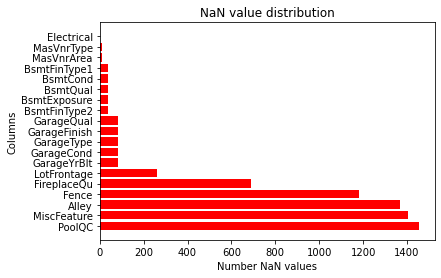

In [171]:
#visualization of NaN values
#NaN_df[['Columns','NaNVal_total']].sort_values('NaNVal_total',ascending = True).plot(kind = 'barh',color = 'r')
plt.barh(NaN_df['Columns'],NaN_df['NaNVal_total'],color = 'r')
plt.xlabel('Number NaN values')
plt.ylabel('Columns')
plt.title('NaN value distribution')

The features _PoolQC_,_MiscFeature_, _Alley,Fence_ contain a very high percentage of NaN values. Hence they must be dropped.

In [172]:
# Checking the datatype contained in each of the most NaN valued column
train_df[['PoolQC','MiscFeature', 'Alley','Fence']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PoolQC       7 non-null      object
 1   MiscFeature  54 non-null     object
 2   Alley        91 non-null     object
 3   Fence        281 non-null    object
dtypes: object(4)
memory usage: 45.8+ KB


Since the highly NaN valued columns are all categorical, we will simply perform imputation. But if they were numeric, they would have been dropped.

### 3.5 Numerical and Categorical data

#### Numerical columns

In [173]:
numeric_cols = train_df.select_dtypes(exclude = 'object').columns.tolist()
print('Numerical columns:',numeric_cols[:5])
print('No. of numerical columns:',len(numeric_cols))

Numerical columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']
No. of numerical columns: 38


#### Discrete numeric features

In [174]:
Discrete_features = [feature for feature in numeric_cols if len(train_df[feature].unique())<25]
print('Discrete numeric features:',Discrete_features)
print('No. of Discrete numeric features:',len(Discrete_features))

Discrete numeric features: ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
No. of Discrete numeric features: 18


#### Continuous features

In [175]:
# Excluding features containing years and house IDs
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']
continuous_features = [feature for feature in numeric_cols if feature not in Discrete_features + year_features+['Id']]
print('Continuous features:',continuous_features)
print('No. of continuous features',len(continuous_features))

Continuous features: ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
No. of continuous features 16


#### Categorical features

In [176]:
categorical_cols = train_df.select_dtypes(include = 'object').columns.tolist()
print('Categrorical columns',categorical_cols[:5])
print('No. of Categorical columns',len(categorical_cols))

Categrorical columns ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']
No. of Categorical columns 43


### 3.6 Identification of skewness and outliers

### Checking the skewness
- Using the .skew() method
- Using the KDE plots

In [177]:
#Using the .skew method
train_df[continuous_features].skew()

LotFrontage       2.163569
LotArea          12.207688
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
GrLivArea         1.366560
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
ScreenPorch       4.122214
SalePrice         1.882876
dtype: float64

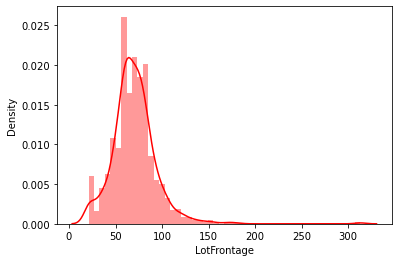

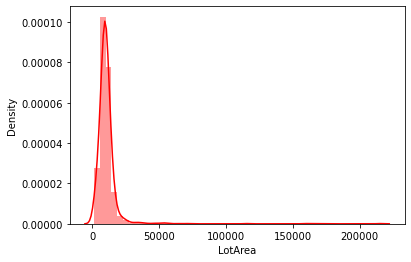

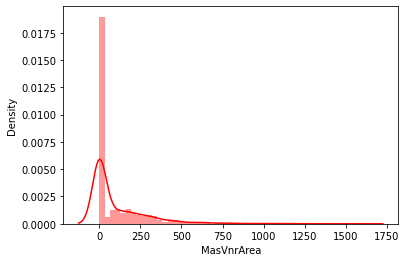

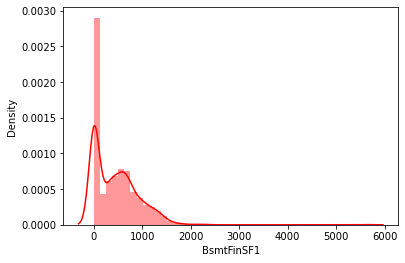

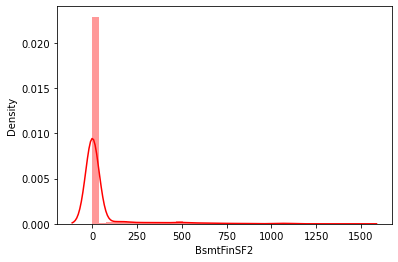

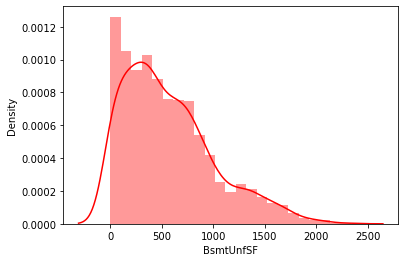

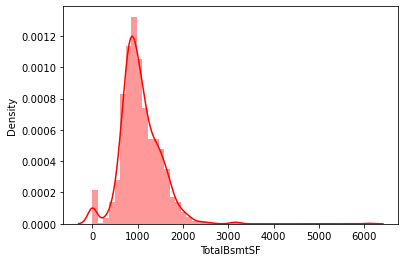

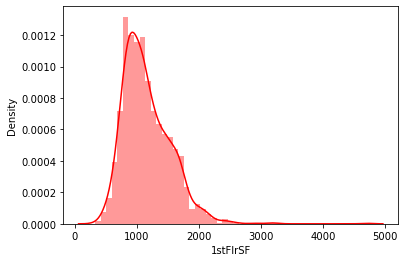

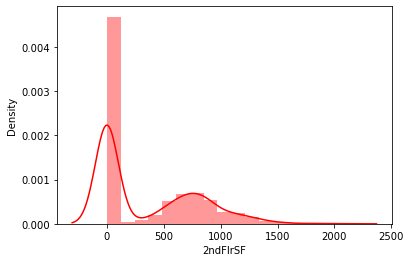

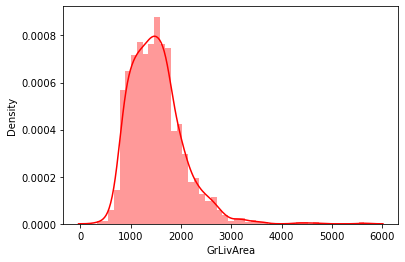

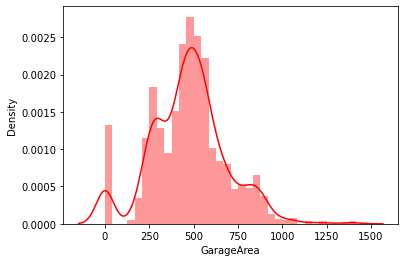

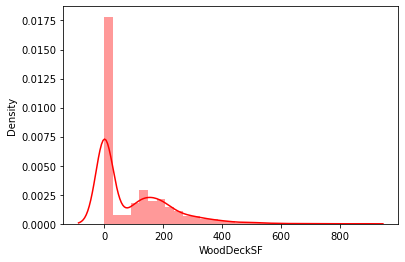

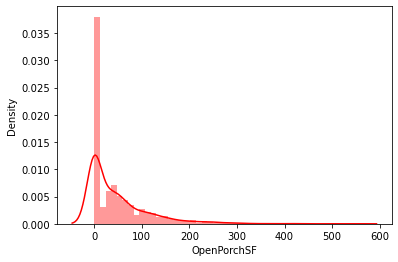

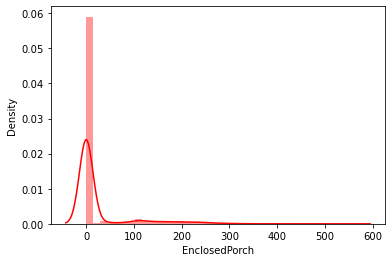

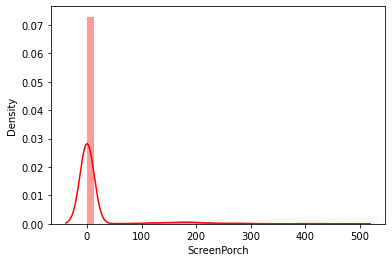

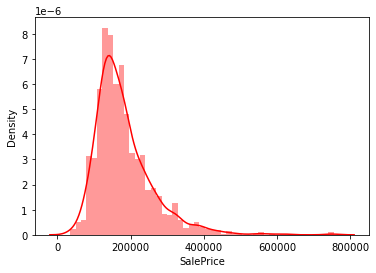

In [178]:
# Using the KDE plots
for feature in continuous_features:
    sns.distplot(train_df[feature],kde = True,color = 'r')
    plt.show()

#### Outliers detection
This could be checked using the 
- Q-Q plots
- KDE plots
- Box plots

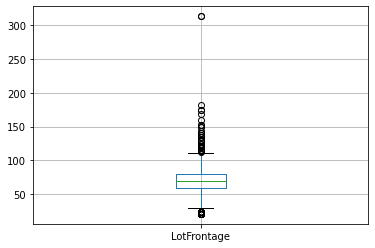

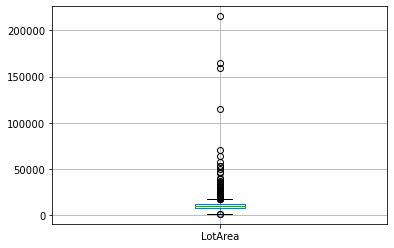

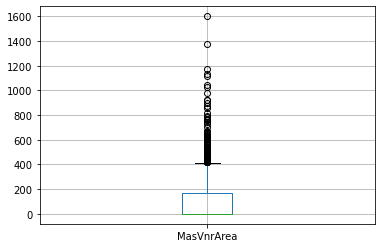

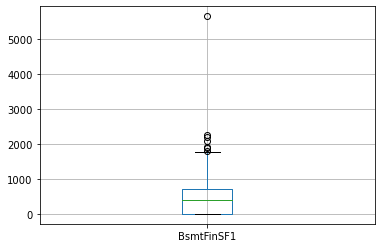

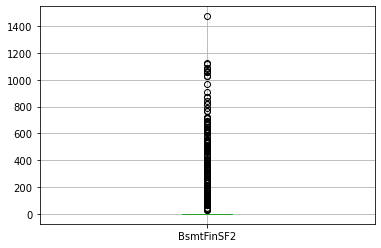

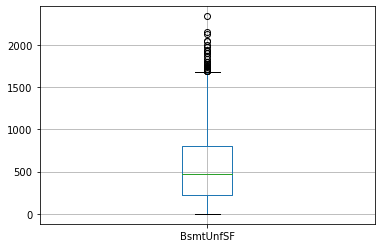

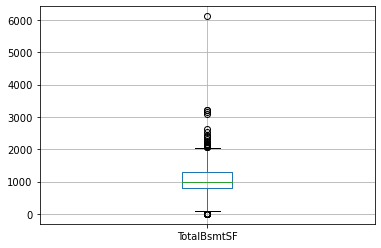

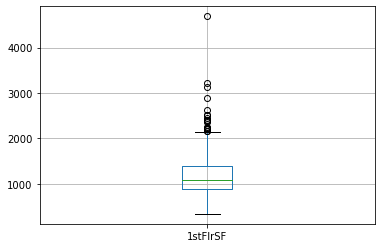

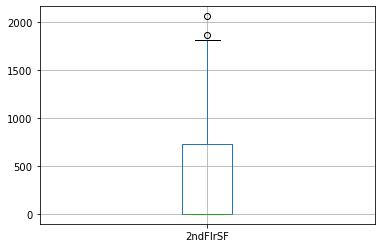

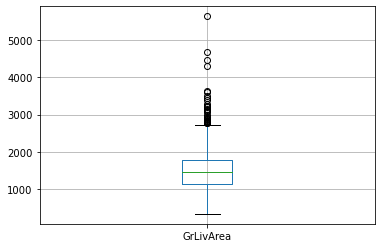

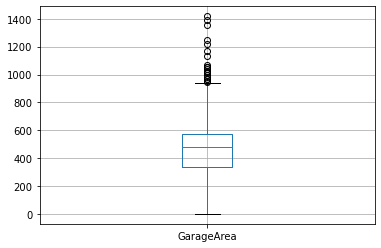

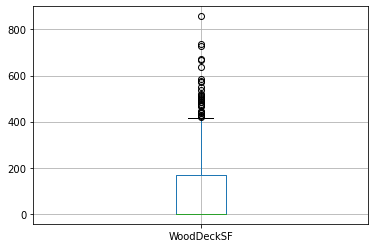

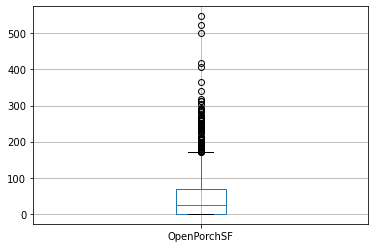

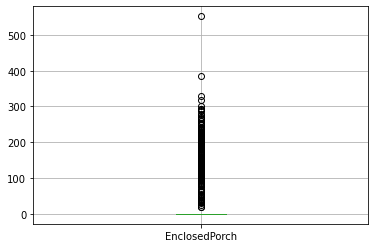

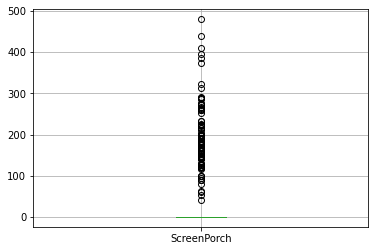

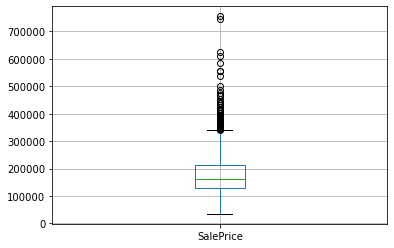

In [179]:
# Using the box plots
# Using the KDE plots
for feature in continuous_features:
    train_df.boxplot(column = feature)
    plt.show()

#### Normality Test
- Using the Q-Q plot

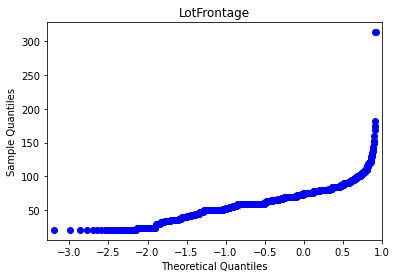

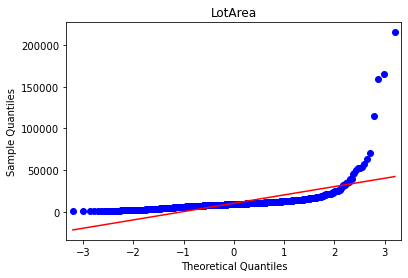

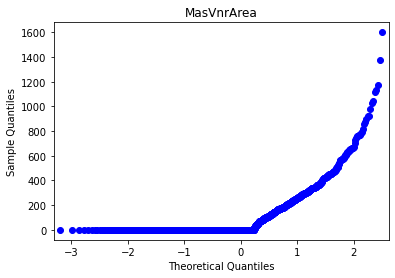

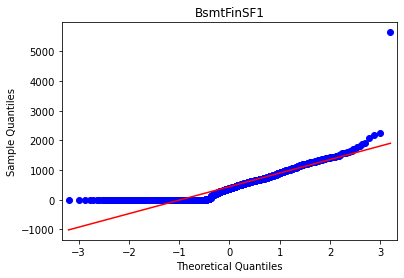

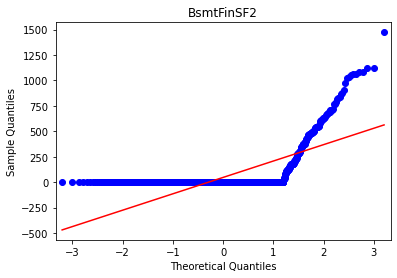

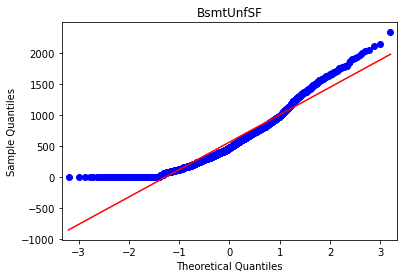

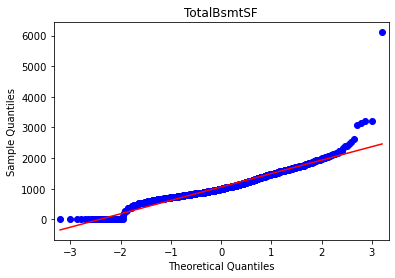

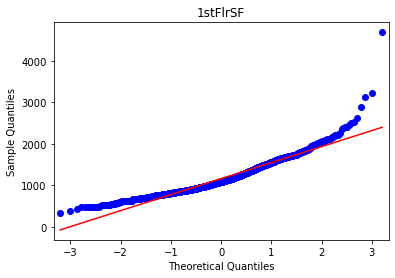

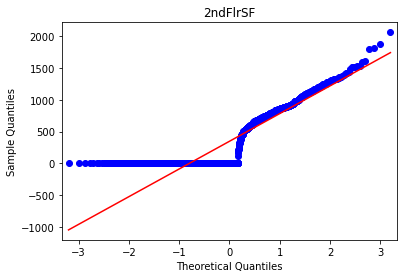

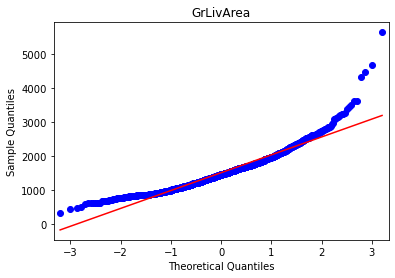

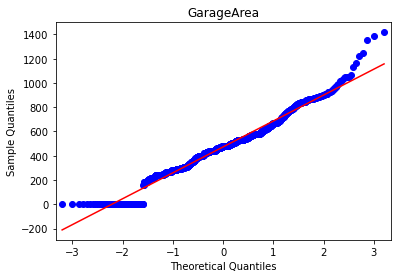

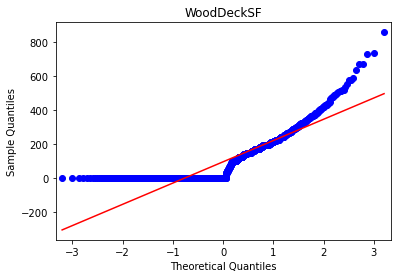

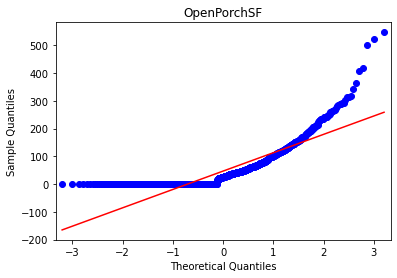

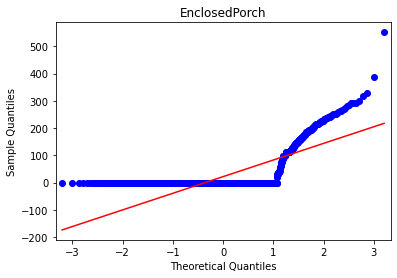

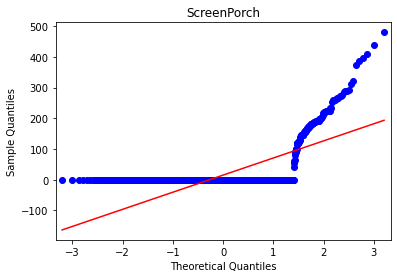

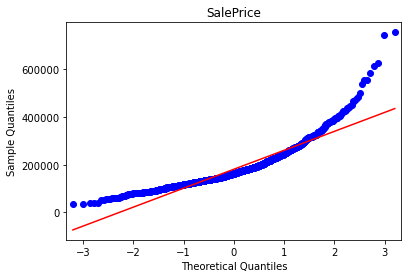

In [180]:
import statsmodels.api as sm
for feature in continuous_features:
    sm.qqplot(train_df[feature],line = 's')
    plt.title('{}'.format(feature))
    plt.show()

## 3.7.Time Series Analysis
- This stage will involve the study of the variation of sales over the years.

In [181]:
# The information contain in the year columns
for feature in year_features:
    print(feature,train_df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
YrSold [2008 2007 2006 2009 2010]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 19

Text(0, 0.5, 'mean house price')

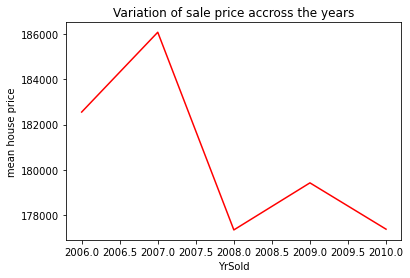

In [182]:
train_df.groupby('YrSold')['SalePrice'].mean().plot(kind = 'line',color = 'r')
plt.title("Variation of sale price accross the years")
plt.ylabel("mean house price")

- It could be observed from the above visualization that there was a sharp increase in the average sale price of houses from 2006 to 2007.From 2007 to 2008 the saleprice dropped dractically. 
- Based on this variation, it could be said  that the increase in house price from 2006 to 2007 was due to the fact the houses were still new and a drop in sale price from 2007 to 2010 was due to an increase in aging of the houses.

## 3.8 Relationship between the  target and features

#### Understanding the relationship between the difference in YrSold and the other years with house price

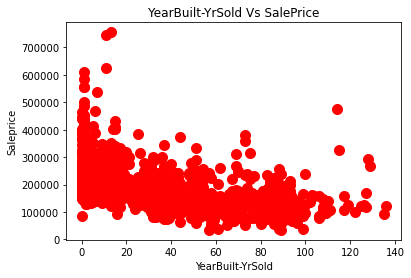

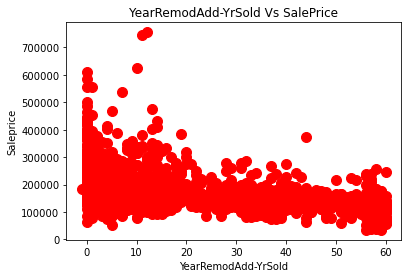

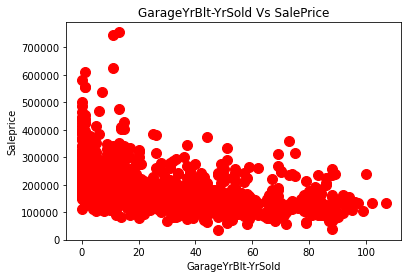

In [183]:
for feature in year_features:
    if feature != 'YrSold':
        data = train_df.copy()
        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature], data['SalePrice'], s = 100,color = 'r')
        plt.xlabel('{}-YrSold'.format(feature))
        plt.ylabel('Saleprice')
        plt.title('{}-YrSold Vs SalePrice'.format(feature))
        plt.show()

- From the above the bove visualizations it could be observed that the house price decreases with time. That is from the time it was built, renovated and a garage built to the the time it was sold.

- During feature engineering phase,the columns:_YearBuilt-YrSold_,_GarageYrBlt-YrSold_,and _YrRemodAdd_ will be created.

#### Relationship between house price and discrete numeric features

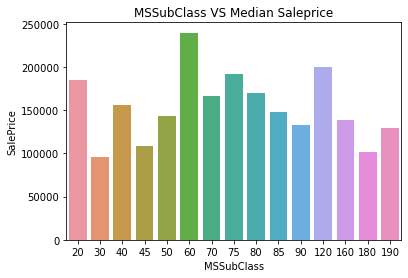

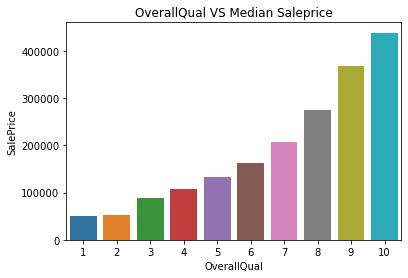

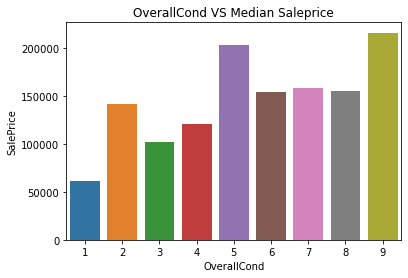

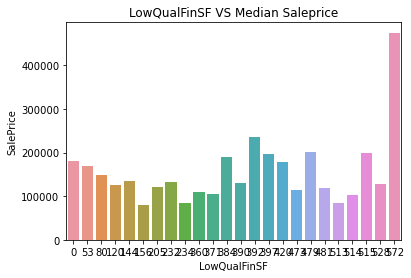

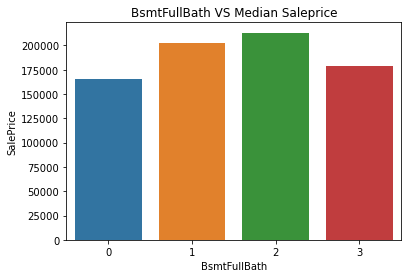

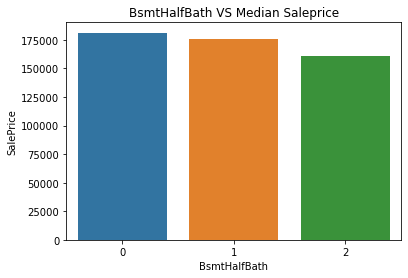

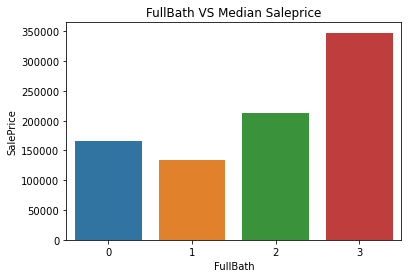

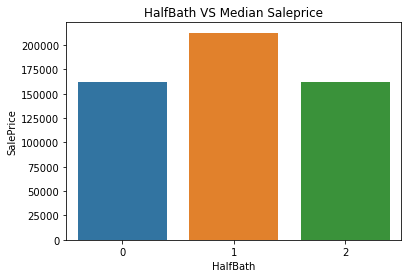

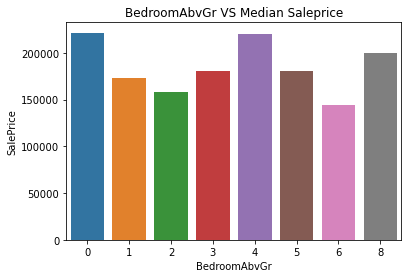

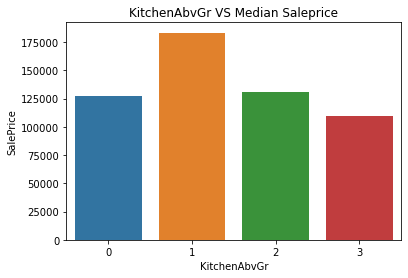

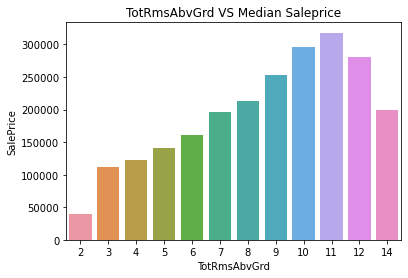

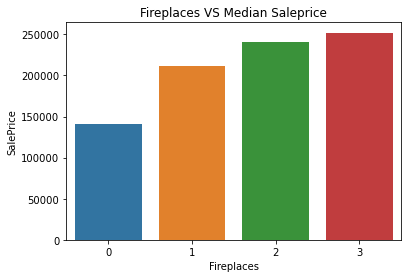

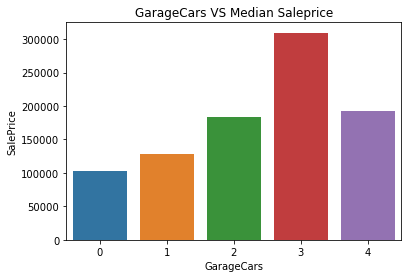

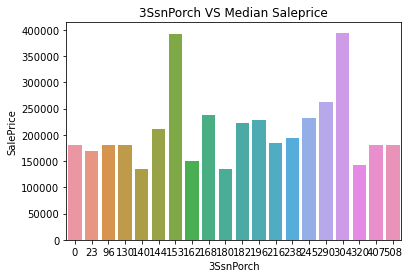

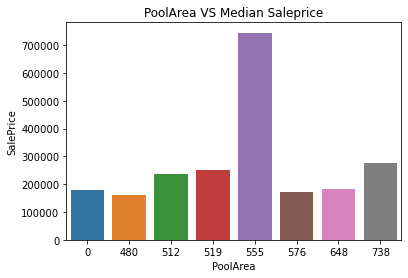

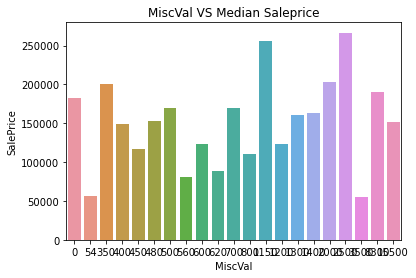

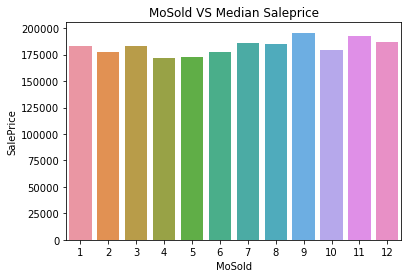

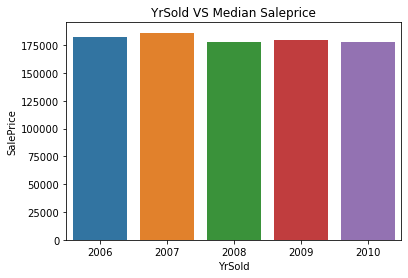

In [184]:
for feature in Discrete_features:
    df1 = train_df.groupby(feature)['SalePrice'].mean()
    sns.barplot(df1.index,df1.values)
    #plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title('{} VS Median Saleprice'.format(feature))
    plt.show()

The house price seems to be 
- Increasing _exponentially_ with Overall Quality of the house,FullBath, GarageCars.
- Uniformly distributed with the number of Full bathrooms at the basement(BsmFullBath),BsmHalfBath,HalfBath,YrSold,MoSold,FirePlace.

#### Understanding the relationship the continuos numeric features and the saleprice

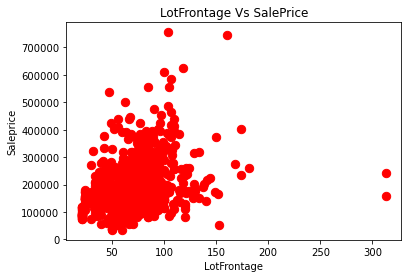

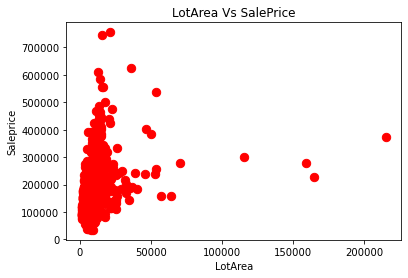

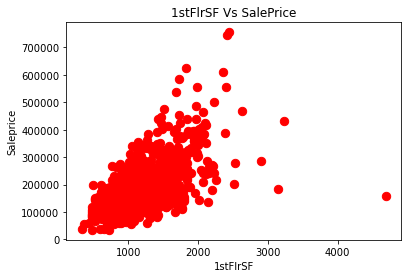

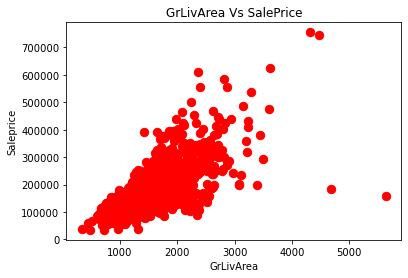

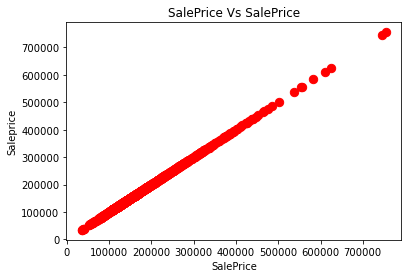

In [185]:
for feature in continuous_features:
    data = train_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.scatter(data[feature],data['SalePrice'],color = 'r',s=70)
        plt.xlabel(feature)
        plt.ylabel('Saleprice')
        plt.title('{} Vs SalePrice'.format(feature))
        plt.show()

- From the above visualizations the house seems to have a positive correlation with _LotArea_, _Lotfrontage_,_1stflrSF_ and _GrLivArea_.
- Pearson correlation could also be used to summarize the strength of the relationship between the various numeric features and the target column.

## 3.9 Correlation matrix
Using Pearson Correlation test,
- To check if the input features are independent or if there exist multicollinearity between the input features.This is done because linear regression requires that there should be no relationship between the features.
- Understand the strength of the linear connection that exist between the input features and the target(SalePrice) 

<AxesSubplot:>

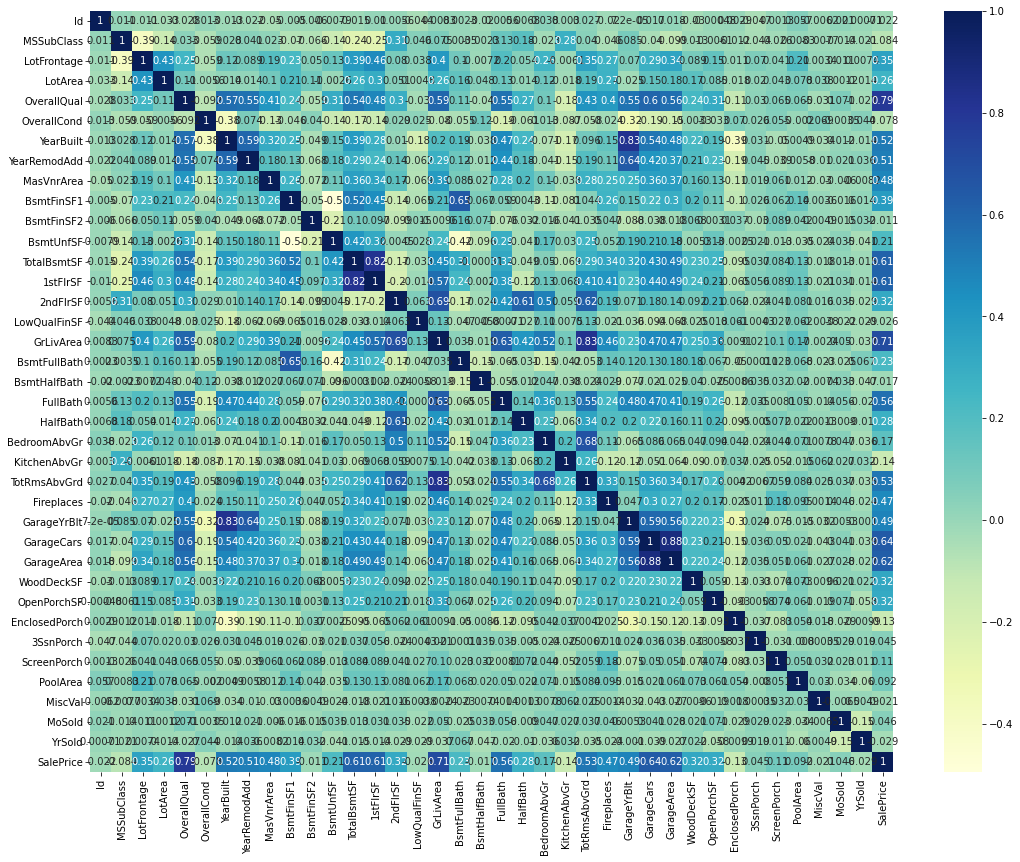

In [186]:
plt.figure(figsize = (18,14))
sns.heatmap(train_df.corr(method = 'pearson'),annot = True,cmap = 'YlGnBu')

From the above correlation matrix, the SalePrice seems to have a strong positive correlation with;
- Garage Area
- Number full bathrooms
- Total number of rooms above Ground Level
- GrLivArea
- Overall Quality
- YearBuilt

## 3.1.0 Summary of Descriptive Analysis

In [187]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 3.1.1 Summary of EDA

- The training data has a total of 1460 records and 81 variables. Thus _Cross Validation_ would be used to split the data rather than Train_test_split.
- The house price falls over time. Thatis from the time it is built,garage built and remodification performed to the time it is sold.New features such as _YearBuilt-YrSold_,_GarageYrBlt-YrSold_,and _YrRemodAdd_ would have to be created.
- The variables _PoolQc,Mscfeature, Alley and Fence_ completely contain NaN values.
- The data is skewed and would be normalized or transformed.
- The Id column has no impact on  house price prediction and most be droped.
- The house price is strongly correlated with the OverallQuality and GrLivArea
- The data contains outliers and would be taken care of during data transformation

The above issues will be handled in the feature engineering phase


# 4. Feature Engineering and Feature Selection

## 4.1 Splitting the data into train and target sets

In [188]:
input_cols = [column for column in train_df.columns if column not in ['SalePrice']]

In [189]:
X_train = train_df[input_cols]
y_train = train_df['SalePrice']

## 4. 2 Creation of new features

##### Creating new date time features

In [190]:
# Creating new features in the dataset
#training set
X_train['YearBuilt-YrSold'] = train_df['YrSold'] - train_df['YearBuilt']
X_train['GarageYrBlt-YrSold'] =  train_df['YrSold'] - train_df['GarageYrBlt']
X_train['YrRemodAdd-YrSold'] = train_df['YrSold']-train_df['YearRemodAdd']
#test set
test_df['YearBuilt-YrSold'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['GarageYrBlt-YrSold'] =  test_df['YrSold'] - test_df['GarageYrBlt']
test_df['YrRemodAdd-YrSold'] = test_df['YrSold']-test_df['YearRemodAdd']

In [191]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,YearBuilt-YrSold,GarageYrBlt-YrSold,YrRemodAdd-YrSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,5,5.0,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,31,31.0,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,7,7.0,6
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,91,8.0,36
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,8,8.0,8


## 4.3 Droping the original date-time features and Id column

In [192]:
X_train = X_train.drop(X_train[year_features+['Id']],axis = 1)

In [193]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,YearBuilt-YrSold,GarageYrBlt-YrSold,YrRemodAdd-YrSold
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,WD,Normal,5,5.0,5
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,WD,Normal,31,31.0,31
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,WD,Normal,7,7.0,6
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,WD,Abnorml,91,8.0,36
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,WD,Normal,8,8.0,8


## 4.4 Treatment of NaN values

### 4.4.0 Imputation of NaN values in numerical Features 

In [194]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
numeric_columns = X_train.select_dtypes(exclude = 'object').columns.tolist()
X_train[numeric_columns] = imputer.fit_transform(X_train[numeric_columns])
#checking NaN values
X_train[numeric_columns].isna().sum()[:4]

MSSubClass     0
LotFrontage    0
LotArea        0
OverallQual    0
dtype: int64

The NaN values were imputed above using the median because the median is not usually affected by outliers.

### 4.4.1 Imputation of NaN values in Categorical columns

In [196]:
imputer2 = SimpleImputer(strategy = 'most_frequent')

X_train[categorical_cols] = imputer2.fit_transform(X_train[categorical_cols])
#checking NaN values
X_train[categorical_cols].isna().sum()[:4]

MSZoning    0
Street      0
Alley       0
LotShape    0
dtype: int64

## 4.5 Treatment of outliers and Skewness of Target
Here the following will be performed;
- Log Transformation of Target column(SalePrice), to ensure that the model is not bias in making predictions of the SalePrice.
- Scaling of Numerical features to ensure that the model treats the features equally.

### 4.5.0 Scaling of numerical features
- Using the MinMaxScaler

In [197]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_columns = X_train.select_dtypes(exclude = 'object').columns.tolist()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

In [198]:
X_train[numeric_columns].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt-YrSold,GarageYrBlt-YrSold,YrRemodAdd-YrSold
0,0.235294,0.150685,0.033420,0.666667,0.500,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.036765,0.046729,0.098361
1,0.000000,0.202055,0.038795,0.555556,0.875,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.227941,0.289720,0.524590
2,0.235294,0.160959,0.046507,0.666667,0.500,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.051471,0.065421,0.114754
3,0.294118,0.133562,0.038561,0.666667,0.500,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.669118,0.074766,0.606557
4,0.235294,0.215753,0.060576,0.777778,0.500,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.058824,0.074766,0.147541


### 4.5.1 Log Transformation of SalePrice

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

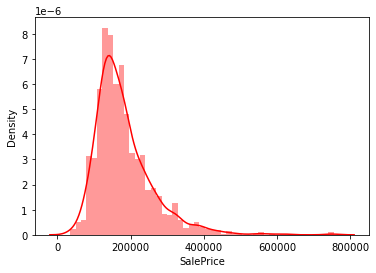

In [199]:
#Before Transformation
sns.distplot(y_train,kde = True,color = 'r')

From the above the sale price seems to be right skewed.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

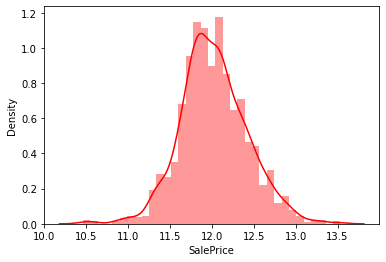

In [200]:
y_train = np.log(y_train)

#After Log Transformation
sns.distplot(y_train,kde = True,color = 'r')

## 4.4 One Hot Encoding of Categorical feature

In [201]:
from sklearn.preprocessing import OneHotEncoder
# Building the encoder
encoder = OneHotEncoder(sparse = False,handle_unknown = 'ignore')

#Fitting the encoder into the categorical features
encoder.fit(X_train[categorical_cols])

#Printing out the names of the encoded columns
encoded_cols = list(encoder.get_feature_names(categorical_cols))
#Getting the names of unique categories per column
#print('Unique categories:',encoder.categories_)
# Using the transform method to perform encoding
X_train[encoded_cols] = encoder.transform(X_train[categorical_cols])

In [202]:
X_train[encoded_cols].head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondi

### Processed input data

In [203]:
processed_data = X_train[numeric_columns + encoded_cols]
processed_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt-YrSold,GarageYrBlt-YrSold,YrRemodAdd-YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQu

In [206]:
len(y_train), len(processed_data)

(1460, 1460)

# 5. Model training and Evaluation
- This would be done using Cross-Validation method inorder to improve the model performance on unseen data.
- The metric of evaluation would be the RMSE

## 5.1 Training ,Evaluation and Selecting the best model

### 5.1.1 Importing models to be trained

In [207]:
# Importing Cross-Validation package and models
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## List of models
Models = []
Models.append(('LR',LinearRegression()))
Models.append(('DT', DecisionTreeRegressor()))
Models.append(('RF',RandomForestRegressor()))
Models.append(('XGB', XGBRegressor()))
#Models.extend([LR,DT,RF,XGB])

### 5.1.2 Training and Evaluation of models using Cross Validation

In [208]:
#Using un normalized target,SalesPrice
y_train = train_df['SalePrice']

In [209]:
for name,model in Models:
    scores = cross_val_score(model, processed_data, y_train, scoring='neg_mean_squared_error', cv=5)
    print('{}_mse:{}'.format(name,scores))


LR_mse:[-3.17126075e+29 -8.70236932e+28 -4.02611016e+27 -1.40666841e+28
 -4.41688937e+29]
DT_mse:[-1.54157812e+09 -1.37428831e+09 -1.18984916e+09 -1.19980095e+09
 -2.19434145e+09]
RF_mse:[-7.15315588e+08 -1.09452015e+09 -9.58855278e+08 -5.90718056e+08
 -1.20994226e+09]
XGB_mse:[-6.57291119e+08 -1.18548197e+09 -1.05765441e+09 -5.49268967e+08
 -8.69830122e+08]


In [210]:
for name,model in Models:
    scores = cross_val_score(model, processed_data, y_train, scoring='r2', cv=5)
    print('{}_r2:{}'.format(name,scores))

LR_r2:[-5.73192289e+19 -1.32442652e+19 -5.31303442e+17 -2.77676411e+18
 -6.58709317e+19]
DT_r2:[0.6899073  0.7118846  0.84350653 0.75886346 0.60463123]
RF_r2:[0.86763621 0.83849645 0.87036232 0.88501633 0.8168903 ]
XGB_r2:[0.88119734 0.81957974 0.86042721 0.89157428 0.87027857]


### 5.1.3 Selecting the best models using the Coefficient of Determination(r2)

- Using the r2_score values above it is observed that XGBOOST,DecisionTree and RandomForest models fits the trainig data best as compared to the Linear Regression model. As a result, they would perform well on unseen data.
- XGBoost and RandomForest explains a greater proportion of the variation(85% for each)  of the target variable(SalePrice) than the other other models.
- Therefore RandomForest and XGBoost Regressors would be selected as the best candidates for this task.

## 5.2 Hyperparameter Tuning of the XGBoost
- This model would be tuned using GridSearch in Python

In [211]:
%time
from sklearn.model_selection import GridSearchCV

#Defining the model's paramters to be tuned
parameters = {"colsample_bytree":[0.6,0.75,1],
              "learning_rate":[0.01,0.05,0.1,1],
              "max_depth":[2,6,8],
              "n_estimators":[50,100],
             "min_child_weight":[1,5]}

# initialise an XGBoost classifier, set the number of estimators,
# evaluation metric & early stopping rounds
estimator = XGBRegressor(n_estimators=100, 
                              n_jobs=-1,
                              random_state=42,
                              eval_metric= 'rmse',
                             )
# Performing GridSearch to obtain the best version of the model
model = GridSearchCV(estimator=estimator,
                             param_grid=parameters,
                             cv=5,
                             scoring="neg_mean_squared_error")
#Fitting the model into the data
model.fit(processed_data,y_train,verbose = 0)

Wall time: 0 ns


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', gamma=None, gpu_id=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                   

In [213]:
print(model.best_params_)

{'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}


####  Best version of the selected model using best Parameters  from GridSearch

In [214]:
best_model = XGBRegressor(n_estimators=100, n_jobs=-1,random_state=42,
                          colsample_bytree=0.6,learning_rate=0.1,max_depth=6,
                          min_child_weight=5)

### 5.3 Feature Selection
This could be achieved using
- feature_importances_
- Principal Component Analysis(PCA)

### Feature Importance

In [215]:
best_model.fit(processed_data,y_train)
feature_importances = best_model.feature_importances_

importance_df = pd.DataFrame({'Column':processed_data.columns,'Importance':feature_importances}).sort_values('Importance',ascending = False)

# display the first 5 rows
importance_df.head()

,Column,Importance
3,OverallQual,0.237568
169,ExterQual_TA,0.192491
22,GarageCars,0.138475
181,BsmtQual_Ex,0.064733
13,GrLivArea,0.028868


Text(0.5, 1.0, 'Importance Features')

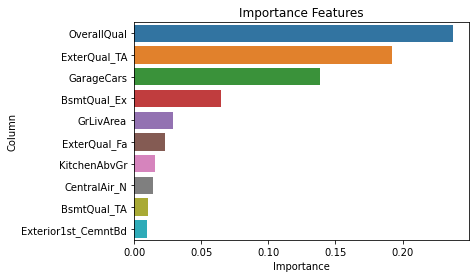

In [216]:
sns.barplot(data = importance_df.head(10), x = 'Importance', y = 'Column',palette = 'tab10')
plt.title('Importance Features')

- The visualization above displays the top 10 important features that can be used for House price prediction.
- To avoid lossing data in the course dropping features and considering only the top 10 important features, PCA could be used to reduce the dimensionality of the data. Thus reducing model overfitting.

### Principal Component Analysis PCA
- GridSearch algorithm will be performed to select the best values of n_components in PCA

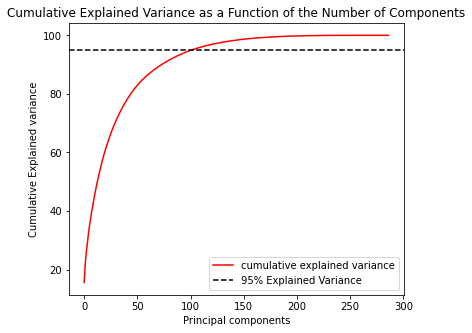

In [217]:
from sklearn.decomposition import PCA
pca = PCA().fit(processed_data)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(6, 5))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

- The number of components to which the processed_data will be projected on to is selected selected such that they should be able to explain at least 95% of the variance in the data.
- Making use of the Cummulative Eplained Varience as a function of the number of component, the best value of n_components is 100.

# 6. End-to-end Machine Learning Pipeline

In [218]:
# Import libraries
import pandas as pd
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [219]:
#Load data
train_df = pd.read_csv('D:/sqldatasets/house_price/train.csv')
test_df = pd.read_csv('D:/sqldatasets/house_price/test.csv')

In [220]:
#Spliting the train set into target and input
input_cols = [feature for feature in train_df.columns if feature not in ['SalePrice']]
x_train = train_df[input_cols]
y_train = train_df['SalePrice']

In [221]:
#Feature Engineering(Adding new features)
class AddNewFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self,document,y=None):
        return self
    def transform(self,data):
        data['YearBuilt-YrSold'] = data['YrSold'] - data['YearBuilt']
        data['GarageYrBlt-YrSold'] =  data['YrSold'] - data['GarageYrBlt']
        data['YrRemodAdd-YrSold'] = data['YrSold']-data['YearRemodAdd']
        return data

In [222]:
#Feature Engineering(droping features)
class dropfeatures(BaseEstimator, TransformerMixin):
    def __init__(self,drop_columns):
        self.drop_columns = drop_columns
        return 
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X = X.drop(columns=self.drop_columns, axis=1)
        return X

In [223]:
#Numerical Pipeline
numerical_pipeline = Pipeline([('numerical_imputer',SimpleImputer(strategy = 'median')),
                              ('feature_scaler',MinMaxScaler())])

In [224]:
#Categorical pipeline
categorical_pipeline = Pipeline([('categorical_imputer',SimpleImputer(strategy = 'most_frequent')),
                                ('categorical_encoder',OneHotEncoder(sparse = False))])

In [225]:
#Column Transformer
num_cols = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1',
 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
 'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
 'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
 'PoolArea','MiscVal','MoSold','YearBuilt-YrSold','GarageYrBlt-YrSold','YrRemodAdd-YrSold']

cat_cols = train_df.select_dtypes(include = 'object').columns.tolist()

column_pipeline = ColumnTransformer([('numerical_pipeline',numerical_pipeline,num_cols),
                            ('categorical_pipeline',categorical_pipeline,cat_cols)])


In [231]:
# Full Machine Learning Pipeline
drop_columns = ['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt','Id']
full_pipeline = Pipeline([('AddNewFeatures',AddNewFeatures()),
                         ('drop_features',dropfeatures(drop_columns)),
                         ('column_pipeline',column_pipeline),
                         ('PCA',PCA(n_components = 100))])
proc_data = full_pipeline.fit_transform(x_train)
best_model = XGBRegressor(n_estimators=100, n_jobs=-1,random_state=42,
                          colsample_bytree=0.6,learning_rate=0.1,max_depth=6,
                          min_child_weight=5)
best_model.fit(proc_data,y_train).predict(proc_data)


array([208800.56, 175843.1 , 224009.8 , ..., 264849.78, 144379.89,
       142745.64], dtype=float32)

In [232]:
#Making predictions on unseen data(Test set)
drop_columns = ['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt','Id']

best_model = XGBRegressor(n_estimators=100, n_jobs=-1,random_state=42,
                          colsample_bytree=0.6,learning_rate=0.1,max_depth=6,
                          min_child_weight=5)

pipeline_modeling = Pipeline([('AddNewFeatures',AddNewFeatures()),
                         ('drop_features',dropfeatures(drop_columns)),
                         ('column_pipeline',column_pipeline),
                         ('PCA',PCA(n_components = 100)),
                         ('model',best_model)])
pipeline_modeling.fit(x_train,y_train).predict(x_train)


array([208159.42, 176613.78, 224750.23, ..., 266301.25, 144976.25,
       145846.53], dtype=float32)

In [233]:
pipeline_modeling.predict(test_df)

array([126082.5 , 146861.98, 179265.33, ..., 132422.31, 131616.52,
       218556.92], dtype=float32)